# Dosa / No Dosa - Image Augmentation

## Frame the Problem

We want to classify the images in two categories - **Dosa** and **No-Dosa**. This is a classical two-class image classification problem.
- Dosa
- No-Dosa

## Acquire the Data

These images very downloaded google.com/images with "reuse with modification" filter to allow for commercial reuse.

In [1]:
#!mkdir data
#!wget https://bit.do/dosa-nodosa -O data/food-binary.zip
#!cd data && unzip food-binary.zip

### Load basic libraries

In [2]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import vis

Using TensorFlow backend.


## Image Augementation

In [3]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [4]:
img = load_img('data/food-binary/Dosa/img39.jpeg')

In [5]:
# Read as matrix and see shape
image = img_to_array(img)
image.shape

(194, 259, 3)

In [6]:
datagen = ImageDataGenerator(rotation_range=45,
                             rescale=1/255,
                             width_shift_range=0.4, 
                             height_shift_range=0.4)

In [7]:
import importlib
importlib.reload(vis)

<module 'vis' from '/volumes/notebooks/deep-learning/vis.py'>

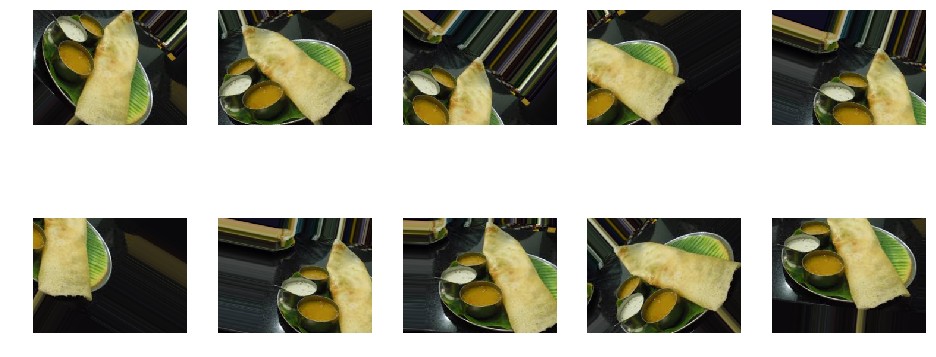

In [8]:
vis.show_single_image_gen(datagen, image, 10)

##### CNN with Image Augementation

**Step 1: Prepare the images and labels**

In [10]:
data = ImageDataGenerator(validation_split=0.2, 
                          rescale=1/255,
                          samplewise_center=True, # set input mean to 0 over the sample
                          samplewise_std_normalization=True,  # divide inputs by std of the sample
                          rotation_range=90,       # randomly rotate images in the range (degrees, 0 to 180)
                          width_shift_range=0.4,   # randomly shift images horizontally (fraction of total width)
                          height_shift_range=0.4,  # randomly shift images vertically (fraction of total height)
                          fill_mode='reflect',     # filling the area outside
                          zoom_range=0.4,          # random zoom
                          horizontal_flip=True,    # randomly flip images
                          vertical_flip=True)      # randomly flip images

In [11]:
train_generator = data.flow_from_directory(directory="data/food-binary/", 
                                           target_size=(224,224),
                                           class_mode="categorical", 
                                           shuffle=True, 
                                           batch_size=8, 
                                           subset='training')

Found 260 images belonging to 2 classes.


In [12]:
val_generator = data.flow_from_directory(directory="data/food-binary/", 
                                           target_size=(224,224),
                                           class_mode="categorical", 
                                           shuffle=True, 
                                           batch_size=8, 
                                           subset='validation')

Found 65 images belonging to 2 classes.


**Step 2: Craft the feature transfomation and classifier model **

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [14]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation='sigmoid'))

In [15]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [16]:
cnn.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [17]:
cnn_output =  cnn.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose = 2)

Epoch 1/10
 - 9s - loss: 0.6399 - acc: 0.6571 - val_loss: 0.6398 - val_acc: 0.6769
Epoch 2/10
 - 6s - loss: 0.6493 - acc: 0.6798 - val_loss: 0.6375 - val_acc: 0.6769
Epoch 3/10
 - 5s - loss: 0.6328 - acc: 0.6592 - val_loss: 0.6445 - val_acc: 0.6769
Epoch 4/10
 - 5s - loss: 0.6421 - acc: 0.6723 - val_loss: 0.6392 - val_acc: 0.6769
Epoch 5/10
 - 5s - loss: 0.6297 - acc: 0.6743 - val_loss: 0.6321 - val_acc: 0.6769
Epoch 6/10
 - 6s - loss: 0.6307 - acc: 0.6799 - val_loss: 0.6429 - val_acc: 0.6769
Epoch 7/10
 - 6s - loss: 0.6426 - acc: 0.6855 - val_loss: 0.6355 - val_acc: 0.6769
Epoch 8/10
 - 5s - loss: 0.6430 - acc: 0.6761 - val_loss: 0.6342 - val_acc: 0.6769
Epoch 9/10
 - 5s - loss: 0.6183 - acc: 0.6761 - val_loss: 0.6426 - val_acc: 0.6769
Epoch 10/10
 - 5s - loss: 0.6249 - acc: 0.6817 - val_loss: 0.6506 - val_acc: 0.6769


In [18]:
cnn_metrics = cnn_output.history

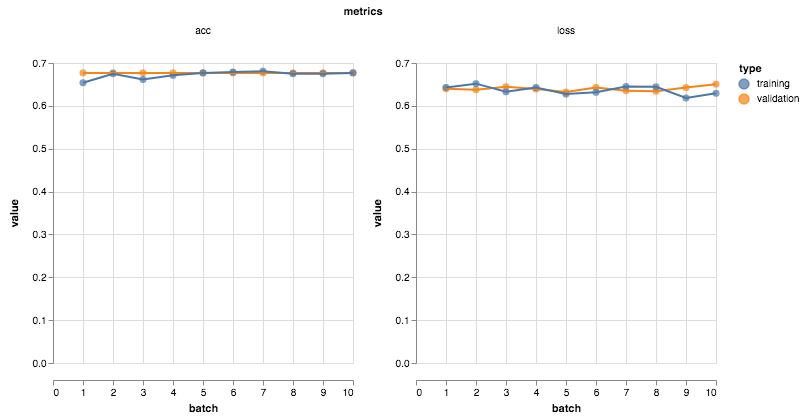

In [19]:
vis.metrics(cnn_metrics)